In [1]:
from transformers import pipeline
from nltk import sent_tokenize
import nltk
import torch
from glob import glob
import pandas as pd
import numpy as np

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#load Model


In [3]:
model_name = "facebook/bart-large-mnli"
device = 0 if torch.cuda.is_available() else "cpu"

In [4]:
device

'cpu'

In [5]:
def load_model(device):
    theme_classifier = pipeline(
        "zero-shot-classification",
        model= model_name,
        device = device
    )

    return theme_classifier

In [6]:
theme_classifier = load_model(device)

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [7]:
theme_list =["friendship","hope","sacrifice","battle","self development","betrayal","love","dialogue"]

In [8]:
theme_classifier(
    "I say good luck to him as he will soon go to the academy for training.",
    theme_list,
    multi_label =  True
)

{'sequence': 'I say good luck to him as he will soon go to the academy for training.',
 'labels': ['hope',
  'self development',
  'dialogue',
  'sacrifice',
  'friendship',
  'love',
  'battle',
  'betrayal'],
 'scores': [0.9718560576438904,
  0.9510124921798706,
  0.7970066666603088,
  0.36778900027275085,
  0.02658611536026001,
  0.016036812216043472,
  0.007592671550810337,
  0.0006037309649400413]}

#Load Dataset

In [9]:
files = glob('../Data/Subtitles/*.ass')

In [10]:
files[0]

'../Data/Subtitles\\Naruto Season 1 - 01.ass'

In [11]:
with open(files[0],'r') as file:
    lines = file.readlines()
    lines = lines[27:]
    
    lines =[",".join(line.split(',')[9:]) for line in lines]
    

In [12]:
lines = [line.replace('\\N',"") for line in lines]

In [13]:
" ".join(lines[:10])

"A long time ago, a powerful demon foxappeared with nine tails.\n With its powerful tails,\n it could smash mountainsand create tidal waves.\n A band of Ninjas rose todefend their village from attack.\n We have to wait untilthe Fourth Hokage gets here!\n We can't let it get any closerto our village!\n One great Ninja was able toimprison the monster,\n but died in the process.\n This Ninja was known asâ€¦the Fourth Hokage.\n Naruto!\n"

In [14]:
int(files[0].split("-")[-1].strip().split(".")[0])

1

In [15]:
def load_subtitle(dataset_path):
    subt_file_path = glob(dataset_path +"/*.ass")
    scripts =[]
    ep_nums = []

    for path in subt_file_path:
        with open(path,'r', encoding='utf-8') as file:
            lines = file.readlines()
            lines = lines[27:]
            
            lines =[",".join(line.split(',')[9:]) for line in lines]
        lines = [line.replace('\\N',"") for line in lines]
        script= " ".join(lines)
        scripts.append(script)

        ep_no = int(path.split("-")[-1].strip().split(".")[0])
        ep_nums.append(ep_no)
            
    df = pd.DataFrame.from_dict({"episodes":ep_nums,"script":scripts})
    return df

In [16]:
dataset_path = '../Data/Subtitles'
df = load_subtitle(dataset_path)

In [17]:
df.head(8)

,episodes,script
0,1,"A long time ago, a powerful demon foxappeared ..."
1,2,"C'mon!\n Running like a fugitive,\n Being chas..."
2,3,"C'mon!\n Running like a fugitive,\n Being chas..."
3,4,"C'mon!\n Running like a fugitive,\n Being chas..."
4,5,"C'mon!\n Running like a fugitive,\n Being chas..."
5,6,"C'mon!\n Running like a fugitive,\n Being chas..."
6,7,"C'mon!\n Running like a fugitive,\n Being chas..."
7,8,"C'mon!\n Running like a fugitive,\n Being chas..."


In [18]:
script = df.iloc[0]['script']
script

'A long time ago, a powerful demon foxappeared with nine tails.\n With its powerful tails,\n it could smash mountainsand create tidal waves.\n A band of Ninjas rose todefend their village from attack.\n We have to wait untilthe Fourth Hokage gets here!\n We can\'t let it get any closerto our village!\n One great Ninja was able toimprison the monster,\n but died in the process.\n This Ninja was known as…the Fourth Hokage.\n Naruto!\n Why did you do such a thing?!\n You\'re really gonna get it this time!\n I don\'t care!\n You know your problem?\n You can\'t do the things I do!\n Only I can do this!\n I\'m better than all of you!Believe it!\n There\'s a problem, sir!\n Lord Hokage!\n What is it?\n Did that Naruto do something again?\n Yes. He climbed ontothe Mountainside Images…\n And he vandalized andgraffitied all over them!\n Wait!\n Ha ha…\n Why should I?\n Hey, Naruto!\n How did you suddenly get here,lruka Sensei?\n The question is what are you doing herewhen you should be in class 

In [19]:
script_sentences = sent_tokenize(script)
script_sentences[:3]

['A long time ago, a powerful demon foxappeared with nine tails.',
 'With its powerful tails,\n it could smash mountainsand create tidal waves.',
 'A band of Ninjas rose todefend their village from attack.']

In [20]:
sentence_batch_size = 20
script_batches = []
for index in range(0,len(script_sentences),sentence_batch_size):
    sent = " ".join(script_sentences[index:sentence_batch_size + index])

    script_batches.append(sent)

In [21]:
script_batches[:2]

["A long time ago, a powerful demon foxappeared with nine tails. With its powerful tails,\n it could smash mountainsand create tidal waves. A band of Ninjas rose todefend their village from attack. We have to wait untilthe Fourth Hokage gets here! We can't let it get any closerto our village! One great Ninja was able toimprison the monster,\n but died in the process. This Ninja was known as…the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you!Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again? Yes.",
 'He climbed ontothe Mountainside Images…\n And he vandalized andgraffitied all over them! Wait! Ha ha…\n Why should I? Hey, Naruto! How did you suddenly get here,lruka Sensei? The question is what are you doing herewhen you should be in class now? Now listen, Naruto. You failed the last grad

In [22]:
theme_output = theme_classifier(
    script_batches[:2],
    theme_list,
    multi_label =  True
)

In [23]:
theme_output

[{'sequence': "A long time ago, a powerful demon foxappeared with nine tails. With its powerful tails,\n it could smash mountainsand create tidal waves. A band of Ninjas rose todefend their village from attack. We have to wait untilthe Fourth Hokage gets here! We can't let it get any closerto our village! One great Ninja was able toimprison the monster,\n but died in the process. This Ninja was known as…the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you!Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again? Yes.",
  'labels': ['dialogue',
   'betrayal',
   'battle',
   'self development',
   'sacrifice',
   'hope',
   'friendship',
   'love'],
  'scores': [0.9732495546340942,
   0.9437205791473389,
   0.8486975431442261,
   0.7226595282554626,
   0.69957435131073,
   0.15611547231674194,
 

In [24]:
themes ={}

for output in theme_output:
    for label,score in zip(output["labels"],output["scores"]):
        if label not in themes:
            themes[label] = []

        themes[label].append(score)

In [25]:
themes = {key : np.mean(np.array(value)) for key,value in themes.items()}


In [26]:
themes

{'dialogue': 0.9371670782566071,
 'betrayal': 0.6308815181255341,
 'battle': 0.6780566871166229,
 'self development': 0.7520154118537903,
 'sacrifice': 0.5551391094923019,
 'hope': 0.1389283612370491,
 'friendship': 0.06077553518116474,
 'love': 0.029484048951417208}

In [27]:
def get_themes_inference(script):
    script_sentences = sent_tokenize(script)
    sentence_batch_size = 20
    script_batches = []
    for index in range(0,len(script_sentences),sentence_batch_size):
        sent = " ".join(script_sentences[index:sentence_batch_size + index])

        script_batches.append(sent)
    theme_output = theme_classifier(
    script_batches[:2],
    theme_list,
    multi_label =  True
    )

    themes ={}

    for output in theme_output:
        for label,score in zip(output["labels"],output["scores"]):
            if label not in themes:
                themes[label] = []

            themes[label].append(score)
    themes = {key : np.mean(np.array(value)) for key,value in themes.items()}

    return themes
        

In [28]:
df = df.head(2)

In [29]:
output_themes = df['script'].apply(get_themes_inference)

In [30]:
theme_df = pd.DataFrame(output_themes.tolist())

In [31]:
theme_df

,dialogue,betrayal,battle,self development,sacrifice,hope,friendship,love
0,0.937167,0.630882,0.678057,0.752015,0.555139,0.138928,0.060776,0.029484
1,0.974036,0.542820,0.679987,0.435066,0.666392,0.147580,0.055368,0.134843


In [32]:
df[theme_df.columns] = theme_df

In [33]:
df

,episodes,script,dialogue,betrayal,battle,self development,sacrifice,hope,friendship,love
0,1,"A long time ago, a powerful demon foxappeared ...",0.937167,0.630882,0.678057,0.752015,0.555139,0.138928,0.060776,0.029484
1,2,"C'mon!\n Running like a fugitive,\n Being chas...",0.974036,0.542820,0.679987,0.435066,0.666392,0.147580,0.055368,0.134843


In [34]:
df = df.drop('dialogue',axis= 1)

In [40]:
theme_output = df.drop(['episodes','script'],axis=1).sum().reset_index()
theme_output.columns = ['Theme','Score']

In [41]:
theme_output

,Theme,Score
0,betrayal,1.173702
1,battle,1.358044
2,self development,1.187082
3,sacrifice,1.221531
4,hope,0.286509
5,friendship,0.116144
6,love,0.164327


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns



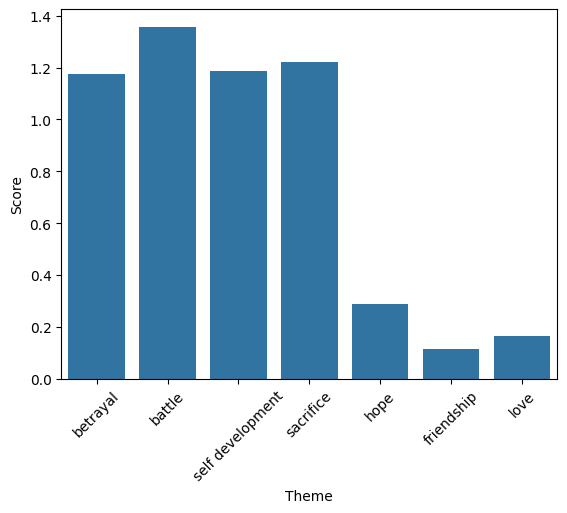

In [45]:
sns.barplot(data= theme_output,x = "Theme",y = "Score")
plt.xticks(rotation = 45)
plt.show()